In [2]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df

,kill,assist,death,turret,role
0,10,2,3,2,penyerang
1,3,9,5,0,bertahan
2,8,4,2,1,penyerang
3,2,11,6,0,bertahan
4,12,3,2,3,penyerang
5,4,10,7,0,bertahan
6,9,5,2,2,penyerang
7,1,13,6,0,bertahan
8,11,4,3,2,penyerang
9,2,12,5,0,bertahan


In [3]:
# melihat struktur data (kolom, tipe, jumlah baris, memori)
print(df.info())
print()

# melihat statistik ringkas untuk kolom numeric (min, max, mean, dll)
print(df.describe())
print()

# mengecek apakah ada data yang kosong
print(df.isnull().sum())    
print()

# mengecek jumlah data per role
print(df['role'].value_counts())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kill    10 non-null     int64 
 1   assist  10 non-null     int64 
 2   death   10 non-null     int64 
 3   turret  10 non-null     int64 
 4   role    10 non-null     object
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes
None

            kill     assist      death     turret
count  10.000000  10.000000  10.000000  10.000000
mean    6.200000   7.300000   4.100000   1.000000
std     4.211096   4.110961   1.911951   1.154701
min     1.000000   2.000000   2.000000   0.000000
25%     2.250000   4.000000   2.250000   0.000000
50%     6.000000   7.000000   4.000000   0.500000
75%     9.750000  10.750000   5.750000   2.000000
max    12.000000  13.000000   7.000000   3.000000

kill      0
assist    0
death     0
turret    0
role      0
dtype: int64

role
penyerang    5
bertahan     5
Name: count, dtype: int64


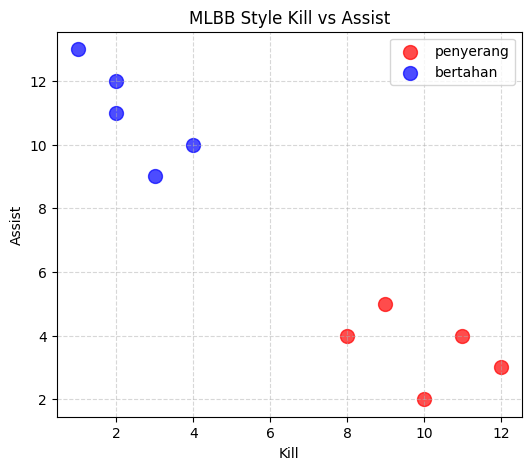

In [4]:
import matplotlib.pyplot as plt

penyerang = df[df["role"] == "penyerang"]
bertahan = df[df["role"] == "bertahan"]

plt.figure(figsize=(6,5))

plt.scatter(penyerang["kill"], penyerang["assist"], color="red", s=100, alpha=0.7, label="penyerang")
plt.scatter(bertahan["kill"], bertahan["assist"], color="blue", s=100, alpha=0.7, label="bertahan")

plt.xlabel("Kill")
plt.ylabel("Assist")
plt.title("MLBB Style Kill vs Assist")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[["kill","assist","death","turret"]]
y = df["role"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 1.0


In [6]:
data_baru = pd.DataFrame([[1,12,7,0]], columns=["kill","assist","death","turret"])
model.predict(data_baru)

# model.predict(data_baru)[0]

array(['bertahan'], dtype=object)

In [11]:
data_lain = pd.DataFrame([[11,8,2,2]], columns=["kill","assist","death","turret"])
# model.predict(data_lain)

model.predict(data_lain)[0]
model.predict_proba(data_lain)[0]

print(model.clas

array([0.05824348, 0.94175652])

In [8]:
import joblib 

joblib.dump(model, "mlbb_model.joblib")

['mlbb_model.joblib']

In [9]:
import joblib
import pandas as pd

loaded_model = joblib.load("mlbb_model.joblib")
data_baru = pd.DataFrame([[3,9,5,1]], columns=["kill","assist","death","turret"])
loaded_model.predict(data_baru)

array(['bertahan'], dtype=object)